# Importation des données S_AUTO


Lien du site ou il y a les données : https://www2.susep.gov.br/menuestatistica/Autoseg/principal.aspx


Attention les données sont très volumieuses.

Lien pour télécharger les données : https://www2.susep.gov.br/redarq.asp?arq=Autoseg2021A%2ezip

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Nettoyage des données


In [ ]:
import pandas as pd
# Load the uploaded CSV file
file_path = '/content/drive/MyDrive/Projet ML/S_AUTO_2021A.csv'

data = pd.read_csv(file_path ,delimiter=';', on_bad_lines='skip', encoding='ISO-8859-1')

# Display basic information about the dataset
summary = {
    "Number of Rows": data.shape[0],
    "Number of Columns": data.shape[1],
    "Column Names": data.columns.tolist(),
    "Missing Values": data.isnull().sum().to_dict(),
    "Data Types": data.dtypes.to_dict()
}

# Show the first few rows for initial inspection
first_rows = data.head()

summary, first_rows

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Projet ML/S_AUTO_2021A.csv'

# **Suppression des variables non interressantes pour le projet**

In [ ]:
# List of columns to drop
columns_to_drop = [
     'ENDOSSO',  'MODALIDADE', 'TIPO_PROD',
     'COD_CONT','ITEM',
    'D_SALVADO', 'D_RESS',  'D_LIQ'
]

# Drop the specified columns
data = data.drop(columns=columns_to_drop, errors='ignore')

print(data.value_counts())

cod_apo     COBERTURA  COD_MODELO  ANO_MODELO  COD_TARIF  REGIAO  EVENTO  INDENIZ  VAL_SALVAD  VAL_RESS  D_AVI     D_OCORR   CAUSA  SEXO  D_NASC    CEP     
22161668.0  1          003462-2    2019        10         11      8       161      0           0         20201005  20201001  9      0     0         4145020     31
12352759.0  1          004478-4    2018        10         15      8       6        0           0         20201203  20201202  7      F     19420411  0           24
13897522.0  1          005477-1    2019        10         11      8       7        0           0         20201111  20201110  7      F     19640711  0           24
12323950.0  1          001355-2    2015        10         16      8       6        0           0         20201203  20201202  7      M     19520107  0           22
13850272.0  1          004380-0    2014        10         11      1       5509     0           0         20200705  20200705  4      0     0         0           22
                            

In [ ]:
print(data['cod_apo'].value_counts())
data = data[data['cod_apo'].notna()]


cod_apo
13553890.0    929
23719290.0    732
4572308.0     624
12073020.0    505
11005192.0    494
             ... 
12263774.0      1
11760233.0      1
11257663.0      1
11257632.0      1
12228074.0      1
Name: count, Length: 1534134, dtype: int64


Nettoyage D_AVI


In [ ]:
print(data['D_AVI'].value_counts())

D_AVI
20201103    29151
20201214    28168
20201228    27463
20201123    26717
20200908    26460
            ...  
20190906        1
20190926        1
20190826        1
20190813        1
20191010        1
Name: count, Length: 495, dtype: int64


## **Nettoyage COD_MODELO**

Code du modèle du véhicule

In [ ]:
# prompt: afficher la colonne COD_MODELO, identifie les different

# Assuming your DataFrame is named 'df'
# Display unique values in the 'COD_MODELO' column and their counts

print(data['COD_MODELO'].value_counts())


COD_MODELO
999999-9    40507
003408-8    37060
015088-6    35252
004424-5    31135
002111-3    30612
            ...  
009087-5        1
080025-2        1
509080-6        1
023174-6        1
508052-5        1
Name: count, Length: 6417, dtype: int64


In [ ]:
# prompt: supprime toute les ligne ou COD_MODELO est egale à 999999-9

# Assuming your DataFrame is named 'df'
# Remove rows where 'COD_MODELO' is equal to '999999-9'

data = data[data['COD_MODELO'] != '999999-9']

# If you want to reset the index after removing the rows:
# df = df.reset_index(drop=True)

print(data['COD_MODELO'].value_counts())

COD_MODELO
003408-8    37060
015088-6    35252
004424-5    31135
002111-3    30612
004360-5    21252
            ...  
509106-3        1
005197-7        1
035035-7        1
827020-1        1
508052-5        1
Name: count, Length: 6416, dtype: int64


Essayer de modifier pour avoir le nom des modèle avec la table 6_9


# Nettoyage ANO_MODELO


Année modèle du véhicule

In [ ]:
print(data['ANO_MODELO'].value_counts())


ANO_MODELO
2014    253663
2019    247928
2013    247313
2018    244194
2015    239008
2012    190517
2017    184332
2016    183256
2011    158624
2020    147958
2010    121421
2009     88010
2008     74814
2007     46482
2006     32362
2005     26415
2021     18322
2004     17434
2003     11809
2002      8587
2001      8365
2000      5409
1999      4224
1998      3362
1997      2882
1996      1955
1995      1906
1994      1118
1993       603
1991       444
1992       408
1990       338
1989       310
1988       287
1986       241
1987       240
1981       208
1985       175
1982        95
1984        78
1983        52
1979        38
1976        36
1977        35
1980        29
1974        19
1978        19
1975        13
1972        12
1973         9
1971         7
1970         2
1967         1
1964         1
2022         1
1969         1
1966         1
Name: count, dtype: int64


# **Nettoyage CAUSA**

Cause du sinistre

In [ ]:
print(data['CAUSA'].value_counts())

CAUSA
9    1303684
4     590563
7     456049
2     158501
5      47798
3      13610
1       3534
6       1634
Name: count, dtype: int64


In [ ]:
data = data[data['CAUSA'] != 8]
data = data[data['CAUSA'] != 0]
print(data['CAUSA'].value_counts())

CAUSA
9    1303684
4     590563
7     456049
2     158501
5      47798
3      13610
1       3534
6       1634
Name: count, dtype: int64


Ajout d'une variable cause :
Code	Cause
* 1	Vol/Rapt (ce code doit être utilisé uniquement lorsque la compagnie ne distingue pas entre vol et rapt)
* 2	Vol
* 3	Rapt
* 4	Collision partielle
* 5	Collision avec indemnisation intégrale
* 6	Incendie
* 7	Assistance 24 heures
* 9	Autres





In [ ]:
cause_mapping = {
    1: "Vol/Rapt (ce code doit être utilisé uniquement lorsque la compagnie ne distingue pas entre vol et rapt)",
    2: "Vol",
    3: "Rapt",
    4: "Collision partielle",
    5: "Collision avec indemnisation intégrale",
    6: "Incendie",
    7: "Assistance 24 heures",
    9: "Autres"
}

# S'assurer que la colonne CAUSA est traitée comme un entier ou une chaîne
data['CAUSA'] = data['CAUSA'].astype(int)

# Créer une nouvelle colonne 'Cause' en mappant les codes de CAUSA
data['Cause'] = data['CAUSA'].map(cause_mapping)

# Vérifier les premières lignes pour confirmer la nouvelle variable
print(data[['CAUSA', 'Cause']])


         CAUSA                Cause
16           9               Autres
17           4  Collision partielle
18           9               Autres
19           9               Autres
20           9               Autres
...        ...                  ...
3747642      4  Collision partielle
3747643      4  Collision partielle
3747644      4  Collision partielle
3747645      4  Collision partielle
3747646      4  Collision partielle

[2575373 rows x 2 columns]


# Nettoyage EVENTO

Code du sinistre

In [ ]:
print(data['EVENTO'].value_counts())


EVENTO
1    1607417
8     665973
2     296598
3       3162
0       1169
5        610
4        331
6         59
7         54
Name: count, dtype: int64


Ajout d'une variable TypeSinistre :

* 1	Coque (Casco)
* 2	Responsabilité Civile Facultative de Véhicules – Dommages Matériels
* 3	Responsabilité Civile Facultative de Véhicules – Dommages Corporels
* 4	Responsabilité Civile Facultative de Véhicules – Dommages Moraux
* 5	Accidents Personnels Passagers – Décès Accidentel
* 6	Accidents Personnels Passagers – Invalidité Permanente par Accident
* 7	Accidents Personnels Passagers – Dépenses Médico-Hospitalières
* 8	Autres

In [ ]:
# Définir la table de correspondance pour la variable EVENTO
evento_mapping = {
    1: "Coque (Casco)",
    2: "Responsabilité Civile Facultative de Véhicules – Dommages Matériels",
    3: "Responsabilité Civile Facultative de Véhicules – Dommages Corporels",
    4: "Responsabilité Civile Facultative de Véhicules – Dommages Moraux",
    5: "Accidents Personnels Passagers – Décès Accidentel",
    6: "Accidents Personnels Passagers – Invalidité Permanente par Accident",
    7: "Accidents Personnels Passagers – Dépenses Médico-Hospitalières",
    8: "Autres"
}

# S'assurer que la colonne EVENTO est traitée comme un entier ou une chaîne
data['EVENTO'] = data['EVENTO'].astype(int)

# Créer une nouvelle colonne 'TypeSinistre' en mappant les codes de EVENTO
data['TypeSinistre'] = data['EVENTO'].map(evento_mapping)

# Vérifier les premières lignes pour confirmer la nouvelle variable
print(data[['EVENTO', 'TypeSinistre']].head())

    EVENTO                                       TypeSinistre
16       1                                      Coque (Casco)
17       2  Responsabilité Civile Facultative de Véhicules...
18       1                                      Coque (Casco)
19       1                                      Coque (Casco)
20       1                                      Coque (Casco)


# **Nettoyage D_NASC**
Changement de La date de naissance pour avoir l'age directement

In [ ]:
import pandas as pd
#Suppression des lignes sans dates
# Assuming the dataset is already loaded into a DataFrame named `data`
data['D_NASC'] = data['D_NASC'].astype(str)
# Remove rows where D_NASC equals '00000000'
data = data[data['D_NASC'] != '00000000']
data = data[data['D_NASC'] != '0']


print(data['D_NASC'].value_counts())



D_NASC
19830325    9704
19801215    1275
19560403     283
19850523     270
19830527     262
            ... 
19320723       1
19320316       1
19310504       1
19270722       1
19261223       1
Name: count, Length: 26839, dtype: int64


Création de la variable AGE

In [ ]:
from datetime import datetime

# Ensure D_NASC is treated as a string
data['D_NASC'] = data['D_NASC'].astype(str)

# Function to calculate age from a date in AAAAMMJJ format
def calculate_age(d_nasc):
    try:
        birth_date = datetime.strptime(d_nasc, "%Y%m%d")
        today = datetime.today()
        age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
        return age
    except ValueError:
        return None  # Return None if the date format is invalid

# Apply the function to calculate age and create a new column
data['AGE'] = data['D_NASC'].apply(calculate_age)


In [ ]:
print(data['AGE'].value_counts())

data = data[data['AGE'] <= 100]
data = data[data['AGE'] > 16]
print(data['AGE'].value_counts())

AGE
41.0     71332
43.0     66483
42.0     65094
45.0     61626
44.0     61491
         ...  
946.0        1
957.0        1
114.0        1
944.0        1
833.0        1
Name: count, Length: 141, dtype: int64
AGE
41.0    71332
43.0    66483
42.0    65094
45.0    61626
44.0    61491
        ...  
21.0        7
20.0        4
19.0        2
17.0        2
18.0        1
Name: count, Length: 84, dtype: int64


# Nettoyage COD_TARIF


Code de la catégorie tarifaire

In [ ]:
print(data['COD_TARIF'].value_counts())

COD_TARIF
10     1545522
22      171595
23       87734
14A      79882
11       71306
        ...   
 51          2
019          1
83           1
062          1
 43          1
Name: count, Length: 73, dtype: int64


In [ ]:
# Définir la table de correspondance pour la variable COD_TARIF
cod_tarif_mapping = {
    "10": "Véhicules de tourisme nationaux",
    "11": "Véhicules de tourisme importés",
    "14A": "Pick-up légères nationales – sauf Kombi et Saveiro",
    "14B": "Pick-up légères nationales – seulement Kombi",
    "14C": "Pick-up légères nationales – seulement Saveiro",
    "15": "Pick-up légères importées",
    "16": "Modèles sportifs nationaux",
    "17": "Modèles sportifs importés",
    "18": "Modèles spéciaux (tourisme) nationaux",
    "19": "Modèles spéciaux (tourisme) importés",
    "20": "Pick-up lourdes de charge nationales",
    "21": "Pick-up lourdes de charge importées",
    "22": "Pick-up lourdes pour passagers nationaux",
    "23": "Pick-up lourdes pour passagers importées",
    "30": "Bicyclettes motorisées, motos, scooters avec remorque ou SIDE-CAR, VESPACAR nationales",
    "31": "Bicyclettes motorisées, motos, scooters avec remorque ou SIDE-CAR, VESPACAR importées",
    "40": "Camions légers nationaux (jusqu'à 6,9 tonnes)",
    "41": "Camions légers importés (jusqu'à 6,9 tonnes)",
    "42": "Camions lourds nationaux (plus de 7 tonnes)",
    "43": "Camions lourds importés (plus de 7 tonnes)",
    "50": "Tracteurs nationaux",
    "51": "Tracteurs importés",
    "52": "Remorques et semi-remorques nationales",
    "53": "Remorques et semi-remorques importées",
    "58": "Autobus et minibus avec frais de transport nationaux (sauf les lignes urbaines régulières)",
    "59": "Autobus et minibus avec frais de transport importés (sauf les lignes urbaines régulières)",
    "60": "Autobus et minibus avec frais de transport nationaux (ligne urbaine régulière)",
    "61": "Autobus et minibus avec frais de transport importés (ligne urbaine régulière)",
    "62": "Autobus et minibus sans frais de transport nationaux",
    "63": "Autobus et minibus sans frais de transport importés",
    "68": "Tracteurs et machines d'usage urbain nationaux",
    "69": "Tracteurs et machines d'usage urbain importés",
    "70": "Tracteurs et machines d'usage rural nationaux",
    "71": "Tracteurs et machines d'usage rural importés",
    "72": "Dépanneuses nationales (véhicules de secours)",
    "73": "Dépanneuses importées (véhicules de secours)",
    "80": "Taxis nationaux",
    "81": "Taxis importés",
    "82": "Transports partagés (Lotação) nationaux",
    "83": "Transports partagés (Lotação) importés",
    "84": "Véhicules scolaires nationaux",
    "85": "Véhicules scolaires importés",
    "86": "Livraisons nationales",
    "87": "Livraisons importées",
    "88": "Livraisons exclusivement en Amérique du Sud – nationaux",
    "89": "Livraisons exclusivement en Amérique du Sud – importés",
    "90": "Véhicules de location nationaux",
    "91": "Véhicules de location importés",
    "92": "Véhicules funéraires nationaux",
    "93": "Véhicules funéraires importés",
    "94": "Ambulances",
    "95": "Auto-écoles",
    "96": "Pompiers",
    "97": "Véhicules de police"}

# S'assurer que la colonne COD_TARIF est traitée comme un string
data['COD_TARIF'] = data['COD_TARIF'].astype(str)

# Créer une nouvelle colonne 'codeTarif' en mappant les codes de COD_TARIF
data['codeTarif'] = data['COD_TARIF'].map(cod_tarif_mapping)

# Vérifier les premières lignes pour confirmer la nouvelle variable
print(data[['COD_TARIF', 'codeTarif']].head())


   COD_TARIF                        codeTarif
16        10  Véhicules de tourisme nationaux
17        10  Véhicules de tourisme nationaux
36        10  Véhicules de tourisme nationaux
37        10  Véhicules de tourisme nationaux
38        10  Véhicules de tourisme nationaux


# Nettoyage D_OCORR

Date de survenance du sinistre

In [ ]:
print(data['D_OCORR'].value_counts())


D_OCORR
20201202    17189
20201002    16644
20201221    16514
20201103    16213
20201110    15886
            ...  
20170620        1
20131023        1
20190817        1
20190922        1
20190227        1
Name: count, Length: 616, dtype: int64


# Nettoyage CEP

Code postal du lieu de l’incident

In [ ]:
print(data['CEP'].value_counts())
data['CEP'] = data['CEP'].astype(str)

data = data[data['CEP'] != '00000000']
data = data[data['CEP'] != '0']
print(data['CEP'].value_counts())

CEP
0           167389
70297400      3972
11740000      2407
11750000      1779
28970000      1473
             ...  
28035232         1
37410860         1
11445340         1
88025120         1
88063289         1
Name: count, Length: 275522, dtype: int64
CEP
70297400    3972
11740000    2407
11750000    1779
28970000    1473
18150000    1458
            ... 
28035232       1
37410860       1
11445340       1
88025120       1
88063289       1
Name: count, Length: 275521, dtype: int64


# Nettoyage VAL_RESS





Montant du remboursement

In [ ]:
print(data['VAL_RESS'].value_counts())

VAL_RESS
0        1992517
0          20286
-200          61
-300          49
-250          38
          ...   
6167           1
3027           1
10447          1
1278           1
10196          1
Name: count, Length: 1538, dtype: int64


Comprendre cette variable !

# Nettoyage VAL_SALVAD


Valeur du bien sauvé

In [ ]:
print(data['VAL_SALVAD'].value_counts())

VAL_SALVAD
0        1194659
0         782450
8000         146
17000        124
6000         124
          ...   
6005           1
35474          1
66600          1
15093          1
11541          1
Name: count, Length: 12540, dtype: int64


# Nettoyage REGIAO


Code de la région de risque

In [ ]:
print(data['REGIAO'].value_counts())

# Ensure REGIAO is treated as a string for consistent filtering
data['REGIAO'] = data['REGIAO'].astype(str)

# Filter to keep only rows where REGIAO contains numeric values
data = data[data['REGIAO'].str.isdigit()]

# Print the value counts for REGIAO to confirm the filtering
print(data['REGIAO'].value_counts())


REGIAO
11    290522
13    152636
16     92470
21     89042
07     70137
       ...  
MS         3
RS         2
MG         1
SC         1
DF         1
Name: count, Length: 94, dtype: int64
REGIAO
11    351642
13    183915
16    112802
21    107564
18     83827
12     73603
07     70137
01     69302
02     63980
23     57696
39     55153
38     50373
08     50274
09     49920
10     44884
05     43135
03     37851
19     37611
20     35815
27     35693
14     34315
15     32854
36     28379
37     25046
25     23241
30     20018
24     18749
04     16811
26     15928
1      14448
7      14376
06     13957
99     13442
2      13055
22     13025
29     11016
17     11000
9      10628
8      10503
5       9668
28      8886
41      8866
3       8081
40      6620
31      5580
4       3227
6       3049
33      2108
35      1412
32       656
34       648
00       293
0         47
Name: count, dtype: int64


In [ ]:
import pandas as pd
#Suppression des lignes sans dates
# Assuming the dataset is already loaded into a DataFrame named `data`
data['REGIAO'] = data['REGIAO'].astype(str)
# Remove rows where D_NASC equals 0
data = data[data['REGIAO'] != '00']
data = data[data['REGIAO'] != '0']


print(data['REGIAO'].value_counts())

REGIAO
11    351642
13    183915
16    112802
21    107564
18     83827
12     73603
07     70137
01     69302
02     63980
23     57696
39     55153
38     50373
08     50274
09     49920
10     44884
05     43135
03     37851
19     37611
20     35815
27     35693
14     34315
15     32854
36     28379
37     25046
25     23241
30     20018
24     18749
04     16811
26     15928
1      14448
7      14376
06     13957
99     13442
2      13055
22     13025
29     11016
17     11000
9      10628
8      10503
5       9668
28      8886
41      8866
3       8081
40      6620
31      5580
4       3227
6       3049
33      2108
35      1412
32       656
34       648
Name: count, dtype: int64


In [ ]:
# Définir la table de correspondance pour la variable CODIGO
codigo_mapping = {
    "01": "RS - Met. Porto Alegre e Caxias do Sul",
    "02": "RS - Demais regiões",
    "03": "SC - Met. Florianópolis e Sul",
    "04": "SC - Oeste",
    "05": "SC - Blumenau e demais regiões",
    "06": "PR - F.Iguaçu-Medianeira-Cascavel-Toledo",
    "07": "PR - Met. Curitiba",
    "08": "PR - Demais regiões",
    "09": "SP - Vale do Paraíba e Ribeira",
    "10": "SP - Litoral Norte e Baixada Santista",
    "11": "SP - Met. de São Paulo",
    "12": "SP - Grande Campinas",
    "13": "SP - Ribeirão Preto e Demais Mun. de Campinas",
    "14": "MG - Triângulo mineiro",
    "15": "MG - Sul",
    "16": "MG - Met.BH-Centro Oeste-Zona Mata-C. Vertentes",
    "17": "MG - Vale do Aço-Norte-Vale Jequitinhonha",
    "18": "RJ - Met. do Rio de Janeiro",
    "19": "RJ - Interior",
    "20": "ES - Espírito Santo",
    "21": "BA - Bahia",
    "22": "SE - Sergipe",
    "23": "PE - Pernambuco",
    "24": "PB - Paraíba",
    "25": "RN - Rio Grande do Norte",
    "26": "AL - Alagoas",
    "27": "CE - Ceará",
    "28": "PI - Piauí",
    "29": "MA - Maranhão",
    "30": "PA - Pará",
    "31": "AM - Amazonas",
    "32": "AP - Amapá",
    "33": "RO - Rondônia",
    "34": "RR - Roraima",
    "35": "AC - Acre",
    "36": "MT - Mato Grosso",
    "37": "MS - Mato Grosso do Sul",
    "38": "DF - Brasília",
    "39": "GO - Goiás",
    "40": "TO - Tocantins",
    "41": "GO - Sudeste de Goiás"
}

# S'assurer que la colonne REGIAO est traitée comme une chaîne
data['REGIAO'] = data['REGIAO'].astype(str)

# Créer une nouvelle colonne 'DescricaoRegiao' en mappant les codes de REGIAO
data['Region'] = data['REGIAO'].map(codigo_mapping)

# Vérifier les premières lignes pour confirmer la nouvelle variable
print(data[['REGIAO', 'Region']].head())

   REGIAO                       Region
16     30                    PA - Pará
17     18  RJ - Met. do Rio de Janeiro
36     18  RJ - Met. do Rio de Janeiro
37     18  RJ - Met. do Rio de Janeiro
38     18  RJ - Met. do Rio de Janeiro


# Nettoyage INDENIZ

Montant total de l'indemnité versée, ou montant estimé si le sinistre n'est pas encore réglé

In [ ]:
print(data['INDENIZ'].value_counts())

INDENIZ
90        60583
124       56980
994       45609
61        43675
98        33878
          ...  
50652         1
156878        1
44385         1
66777         1
41246         1
Name: count, Length: 56641, dtype: int64


# Nettoyage SEXO


Sexe du conducteur

In [ ]:
print(data['SEXO'].value_counts())
data['SEXO'] = data['SEXO'].astype(str)

data = data[data['SEXO'] != '0']

print(data['SEXO'].value_counts())

SEXO
M    1103098
F     906098
0       5573
Name: count, dtype: int64
SEXO
M    1103098
F     906098
Name: count, dtype: int64


# Nettoyage COBERTURA

Type de couverture

In [ ]:
print(data['COBERTURA'].value_counts())

COBERTURA
1    1957666
9      27229
4      12369
2      11793
5        139
Name: count, dtype: int64


Création de la variable TypeCouverture

In [ ]:
# Définir la table de correspondance pour la variable COBERTURA
cobertura_mapping = {
    1: "Couverture complète",
    2: "Couverture incendie et vol",
    3: "Couverture incendie",
    4: "Indemnisation intégrale, collision et vol",
    5: "Couverture collision et incendie",
    9: "Autres"
}

# S'assurer que la colonne COBERTURA est traitée comme un entier ou une chaîne
data['COBERTURA'] = data['COBERTURA'].astype(int)

# Créer une nouvelle colonne 'TypeCouverture' en mappant les codes de COBERTURA
data['TypeCouverture'] = data['COBERTURA'].map(cobertura_mapping)

# Vérifier les premières lignes pour confirmer la nouvelle variable
print(data[['COBERTURA', 'TypeCouverture']].head())

    COBERTURA       TypeCouverture
16          1  Couverture complète
17          1  Couverture complète
36          1  Couverture complète
37          1  Couverture complète
38          1  Couverture complète


In [ ]:
# Installer les bibliothèques nécessaires
!pip install geobr geopandas fiona shapely pyproj rtree


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 31.1 MB/s eta 0:00:00


In [ ]:
pip install geopandas matplotlib pandas


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geobr import read_state


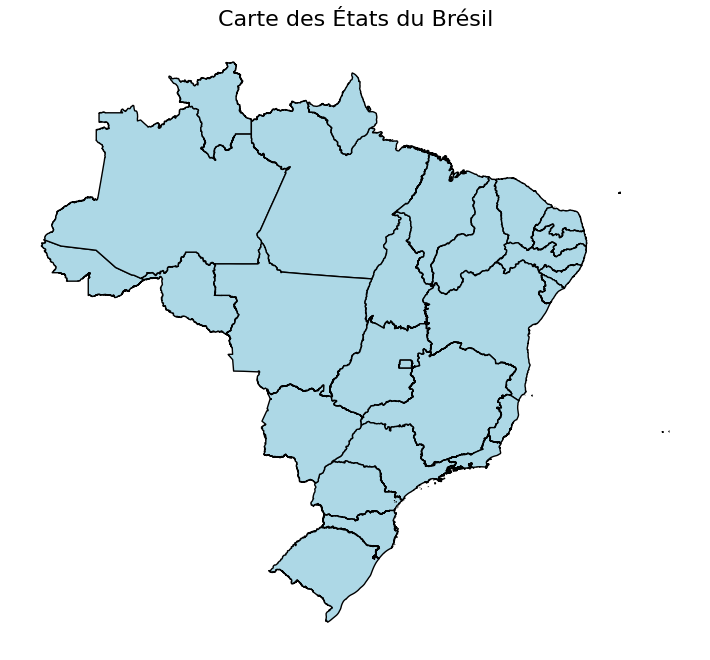

In [ ]:
# Charger les données géographiques des états du Brésil
brazil_states = read_state(year=2019)

# Tracer la carte des états brésiliens
brazil_states.plot(figsize=(10, 8), edgecolor='black', color='lightblue')
plt.title("Carte des États du Brésil", fontsize=16)
plt.axis("off")
plt.show()

#Description statistique


In [ ]:

# Descriptive statistics for numerical columns
numerical_stats = data.describe()

# Descriptive statistics for categorical columns
categorical_stats = data.describe(include=['object'])

# Display the results
print("Numerical Statistics:")
print(numerical_stats)
print("\nCategorical Statistics:")
print(categorical_stats)

Numerical Statistics:
            cod_apo     COBERTURA    ANO_MODELO        EVENTO         D_AVI  \
count  2.009196e+06  2.009196e+06  2.009196e+06  2.009196e+06  2.009196e+06   
mean   1.029555e+07  1.133032e+00  2.013900e+03  2.962487e+00  2.020117e+07   
std    5.947710e+06  9.550000e-01  4.214678e+00  3.054168e+00  2.472624e+04   
min    4.000000e+00  1.000000e+00  1.969000e+03  1.000000e+00  0.000000e+00   
25%    5.647605e+06  1.000000e+00  2.012000e+03  1.000000e+00  2.020082e+07   
50%    9.726260e+06  1.000000e+00  2.014000e+03  1.000000e+00  2.020101e+07   
75%    1.354032e+07  1.000000e+00  2.017000e+03  8.000000e+00  2.020112e+07   
max    2.374478e+07  9.000000e+00  2.021000e+03  8.000000e+00  2.021023e+07   

            D_OCORR         CAUSA           AGE  
count  2.009196e+06  2.009196e+06  2.009196e+06  
mean   2.020096e+07  7.152434e+00  5.155172e+01  
std    2.933528e+02  2.389755e+00  1.400856e+01  
min    2.013102e+07  1.000000e+00  1.700000e+01  
25%    2.020082e

Information météo

age du vehicule

Géolocalisation cartographieque

Analyse de la variable cible

financier

Package sakitler



In [ ]:
output_file = r'C:\Users\migue\Desktop\data_output5.csv'

data.to_csv(output_file, index=False, encoding='utf-8')
print(f"Le fichier CSV a été créé avec succès à l'emplacement : {output_file}")
import os

output_dir = r'C:\Users\migue\OneDrive\M6\Projet_ML'
os.makedirs(output_dir, exist_ok=True)  # Crée le dossier s'il n'existe pas

output_file = os.path.join(output_dir, 'data_output5.csv')
data.to_csv(output_file, index=False, encoding='utf-8')
print(f"Le fichier CSV a été créé avec succès à l'emplacement : {output_file}")

Le fichier CSV a été créé avec succès à l'emplacement : C:\Users\migue\Desktop\data_output5.csv
Le fichier CSV a été créé avec succès à l'emplacement : C:\Users\migue\OneDrive\M6\Projet_ML/data_output5.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Présentation du pipeline


regrouper les circonstance d'zccident
 exemple jour pluvieux
 creéation de nouvelles circonstances

 10 pages

<ipython-input-37-74d30c08894b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=filtered_data, order=top_regions, palette='pastel')


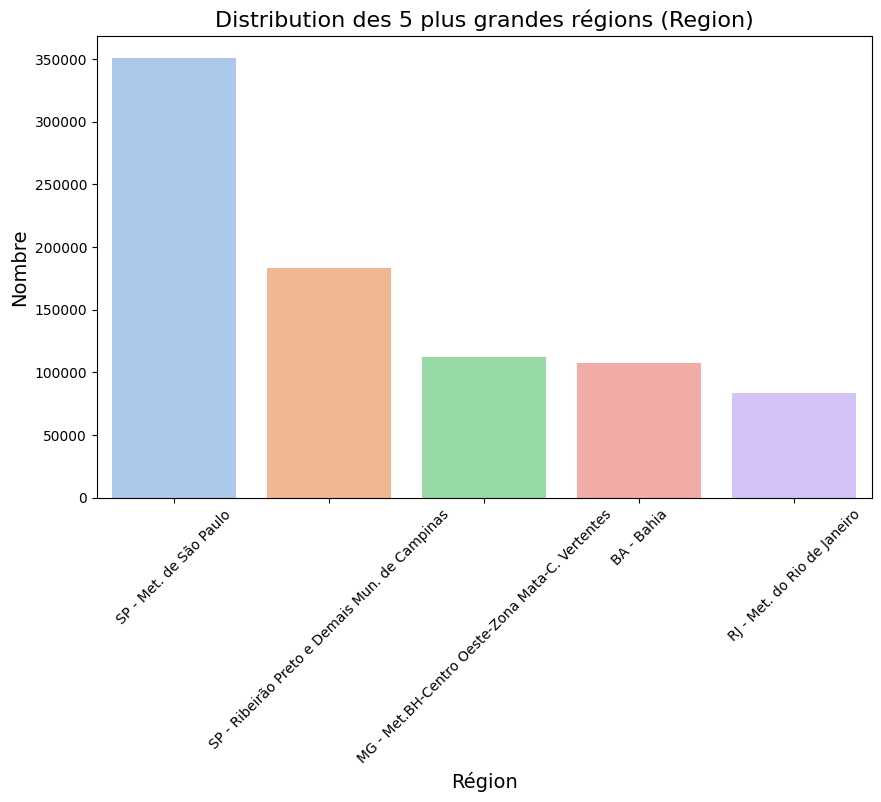

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Calculer les 5 régions les plus fréquentes
top_regions = data['Region'].value_counts().nlargest(5).index

# Filtrer les données pour inclure uniquement les 5 plus grandes régions
filtered_data = data[data['Region'].isin(top_regions)]

# Plot: Distribution des 5 plus grandes régions
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=filtered_data, order=top_regions, palette='pastel')
plt.title('Distribution des 5 plus grandes régions (Region)', fontsize=16)
plt.xlabel('Région', fontsize=14)
plt.ylabel('Nombre', fontsize=14)
plt.xticks(rotation=45)
plt.show()




<ipython-input-38-12015f1bbffd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEXO', data=data, palette='muted')


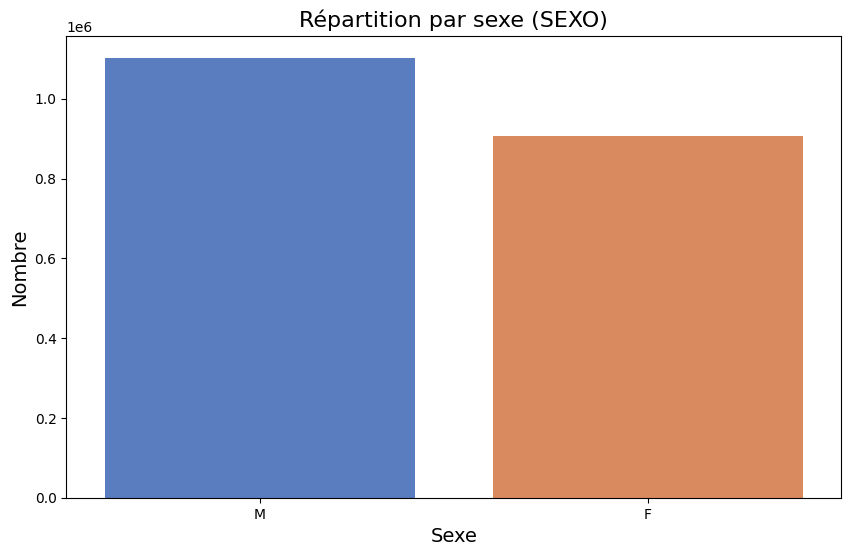

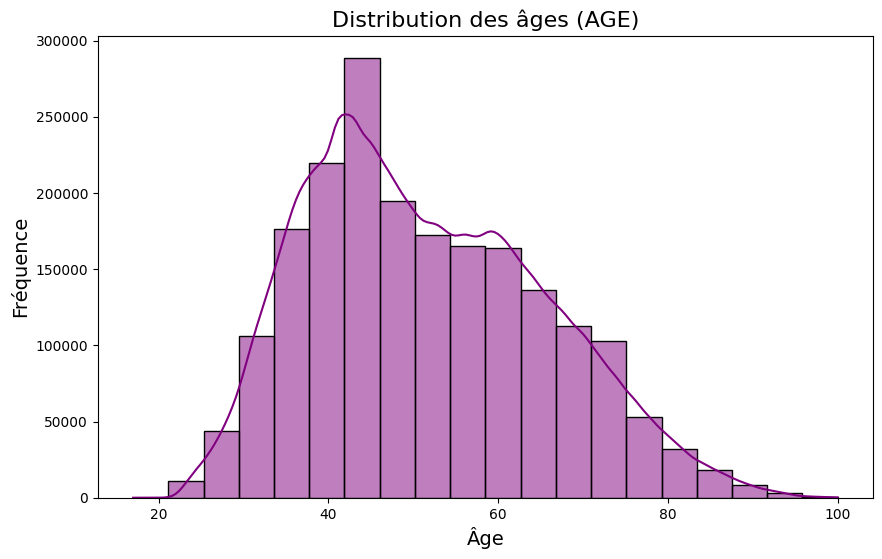

<ipython-input-38-12015f1bbffd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cause', data=data, palette='viridis')


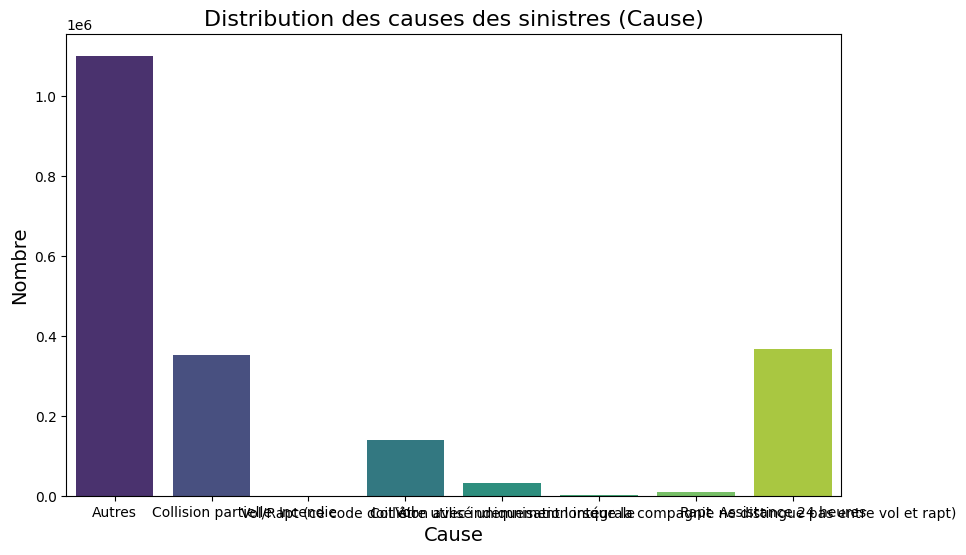

In [ ]:
# Plot : Distribution of Sexe (SEXO)
plt.figure(figsize=(10, 6))
sns.countplot(x='SEXO', data=data, palette='muted')
plt.title('Répartition par sexe (SEXO)', fontsize=16)
plt.xlabel('Sexe', fontsize=14)
plt.ylabel('Nombre', fontsize=14)
plt.show()

# Plot : AGE Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribution des âges (AGE)', fontsize=16)
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.show()


# Plot : Distribution of CAUSA
plt.figure(figsize=(10, 6))
sns.countplot(x='Cause', data=data, palette='viridis')
plt.title('Distribution des causes des sinistres (Cause)', fontsize=16)
plt.xlabel('Cause', fontsize=14)
plt.ylabel('Nombre', fontsize=14)
plt.show()


In [ ]:
# Calculer la fréquence par région
frequence_par_region = data.groupby('REGIAO').size() / data.groupby('REGIAO')['D_OCORR'].nunique()

# Afficher les résultats
print(frequence_par_region)

REGIAO
01    203.394118
02    181.940000
03    113.662651
04     58.303136
05    140.549020
06     52.041199
07    191.155738
08    150.444444
09    167.291946
1      55.041985
10    161.653430
11    931.151194
12    231.504732
13    438.116945
14    113.360927
15    109.711409
16    289.582474
17     42.339768
18    235.907042
19    111.522255
2      48.436567
20     92.193798
21    274.460358
22     47.666667
23    168.598240
24     63.270270
25     86.932331
26     59.014870
27    109.430769
28     35.047619
29     41.839695
3      31.468750
30     65.163399
31     24.657778
32      3.497297
33     10.942408
34      3.467742
35      6.777778
36     87.649068
37     81.829508
38    140.800562
39    168.018349
4      13.531646
40     26.182540
41     34.763780
5      36.927203
6      13.522321
7      54.291667
8      40.257692
9      44.195833
99     73.054348
dtype: float64


In [ ]:
# Convertir les résultats en DataFrame
frequence_par_region_df = frequence_par_region.reset_index(name='FrequenceSinistres')


# Afficher les premières lignes
print(frequence_par_region_df.head())

  REGIAO  FrequenceSinistres
0     01          203.394118
1     02          181.940000
2     03          113.662651
3     04           58.303136
4     05          140.549020


<ipython-input-41-34a5ad838cd6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='REGIAO', y='FrequenceSinistres', data=frequence_par_region_df, palette='coolwarm')


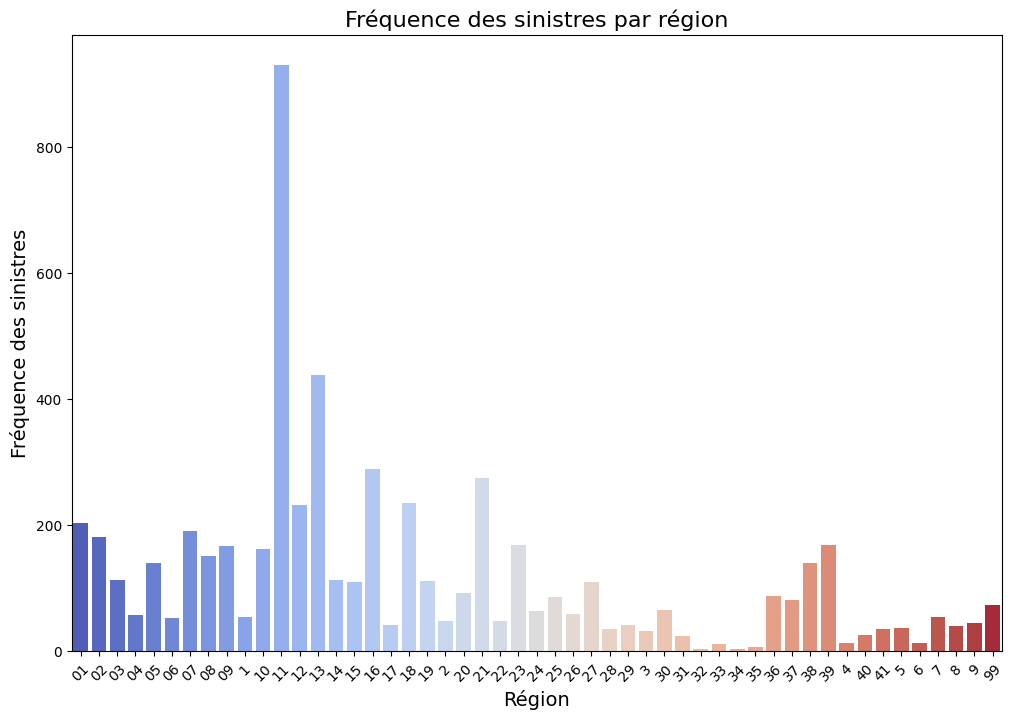

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un graphique des fréquences par région
plt.figure(figsize=(12, 8))
sns.barplot(x='REGIAO', y='FrequenceSinistres', data=frequence_par_region_df, palette='coolwarm')
plt.title('Fréquence des sinistres par région', fontsize=16)
plt.xlabel('Région', fontsize=14)
plt.ylabel('Fréquence des sinistres', fontsize=14)
plt.xticks(rotation=45)
plt.show()


<ipython-input-42-3b36afb44877>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='REGIAO', y='FrequenceSinistres', data=top_5_regions, palette='coolwarm')


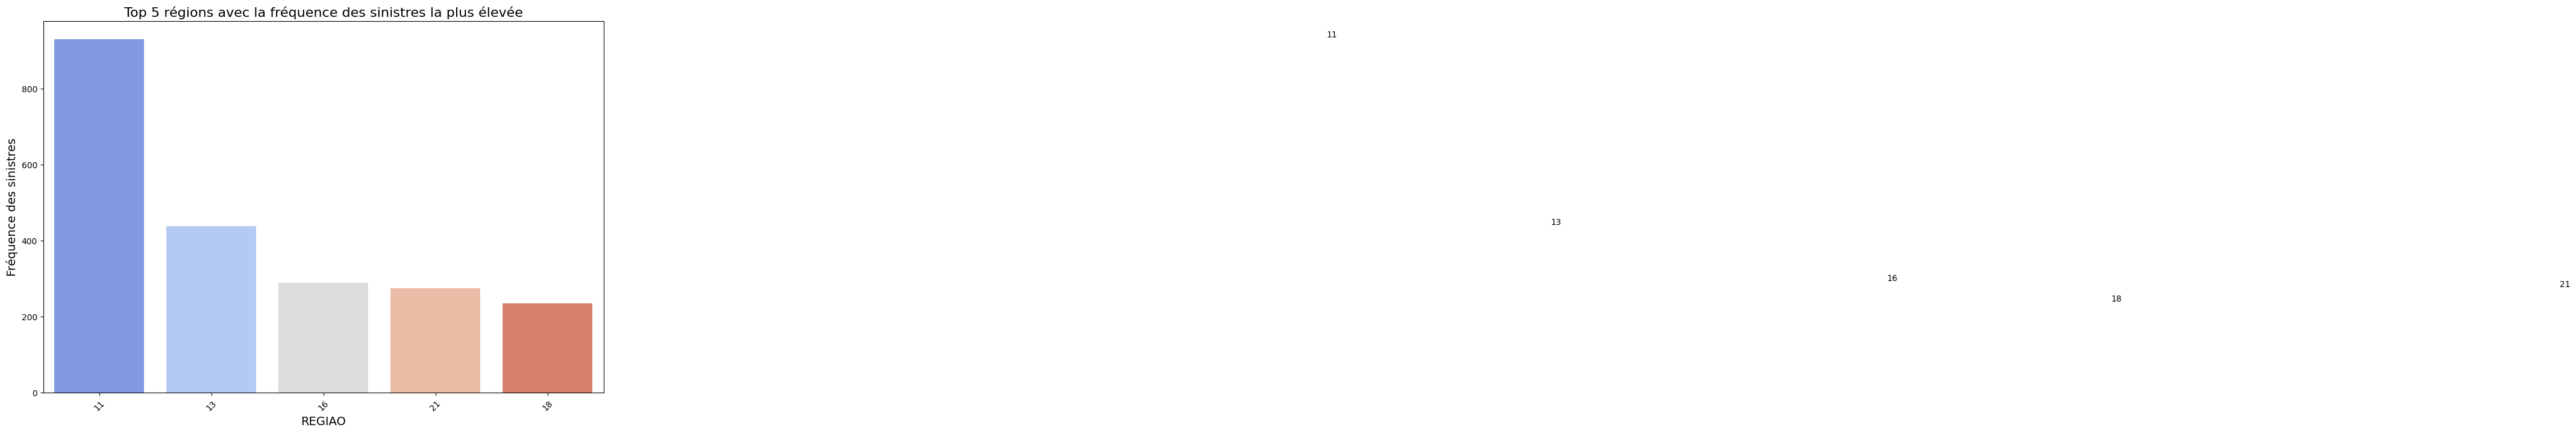

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trier les régions par fréquence décroissante et sélectionner les 5 premières
top_5_regions = frequence_par_region_df.sort_values(by='FrequenceSinistres', ascending=False).head(5)

# Créer un graphique des 5 régions avec la fréquence la plus élevée
plt.figure(figsize=(12, 8))
sns.barplot(x='REGIAO', y='FrequenceSinistres', data=top_5_regions, palette='coolwarm')
plt.title('Top 5 régions avec la fréquence des sinistres la plus élevée', fontsize=16)
plt.xlabel('REGIAO', fontsize=14)
plt.ylabel('Fréquence des sinistres', fontsize=14)
plt.xticks(rotation=45)

# Annoter les barres avec les noms des régions
for i, row in top_5_regions.iterrows():
    plt.text(i, row['FrequenceSinistres'], row['REGIAO'], ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
#Enregister le nettoyage
file_path = r"C:\Users\migue\OneDrive\M2\Projet_ML\sampled_data.csv"

# Enregistrer le DataFrame dans un fichier CSV
df.to_csv(file_path, index=False)

print(f"Le DataFrame a été enregistré sous le chemin : {file_path}")